# Exploratory analysis for the Boston Airbnb listings

# Outline

We'll follow the CRISP-DM methodology:

#### 1. Business Understanding (a brief description of the problem and questions of interest)
#### 2. Data Understanding (Access and Explore)
#### 3. Data Preparation (Cleaning)
#### 4. Modelling
#### 5. Evaluation
#### 6. Deployment

First, load a number of modules, which we will use in this notebook

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

## 1. Business Understanding (a brief description of the problem and questions of interest)

In this notebook we explore a listing dataset provided by Airbnb for the Boston area.

We are mainly interested in predicting the price of the listings. Following the CRISP-DM methodology we'll aim to answer these business oriented questions:

1. Are there interesting features in the data set which support the common expectation of an Airbnb user? Can we spot interesting facts by looking just how such features are correlated?
2. Can we predict prices better than the simple average value of $174?
3. What are the most important features determining the price of a listing?

## 2. Data Understanding (Access and Explore)

In this section we load the data and explore its basic properties:

### 2.1 Load data
- show basic statistic of its numerical features
- display number of rows and columns
- show a small sample of the data

### 2.2 Explore the target value, the price field


### 2.1 Load data

In [2]:
# load the data
listings_file_path = './listings.csv'
listings_df = pd.read_csv(listings_file_path)

# show basic statistics of the numerical features
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [3]:
# display the number of rows and columns respectively
listings_df.shape

(3585, 95)

In [4]:
# display a small sample of the data
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

### 2.2 Explore the target value, the price field

In [5]:
# price is an object, a string starting with $ and containing commas and dot separators
listings_df.price

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [6]:
# Good thing is: there are no missing values in the price column
listings_df.price.isna().sum()

0

In [7]:
# Let's remove the $ and the commas, convert to float and collect the price values in the y, target variable:
# then display basic statistics about the price
# observe the mean price of the listings - approx $174
y = listings_df.price.replace('[\$,]', '', regex=True).astype(float)
y.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

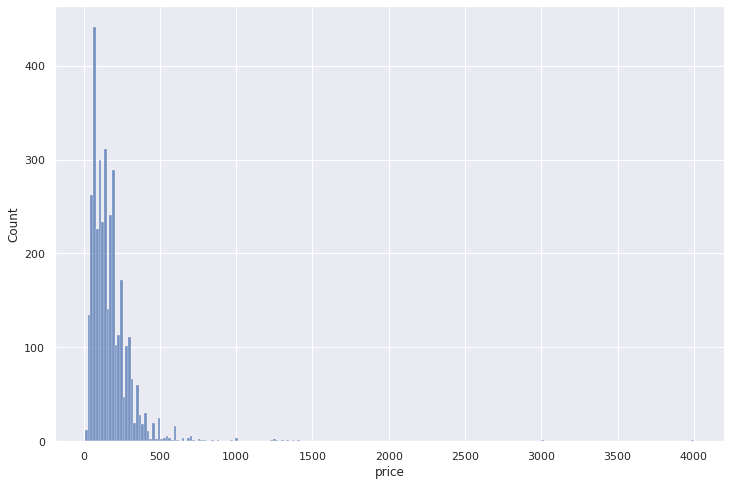

In [8]:
# Explore the price; plot a histogram; the data is very skewed - expected as we talk about money; 
# but apparently many real world datasets are skewed anyway (https://seaborn.pydata.org/generated/seaborn.histplot.html)

sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=y, x=y)

<AxesSubplot:xlabel='price', ylabel='Count'>

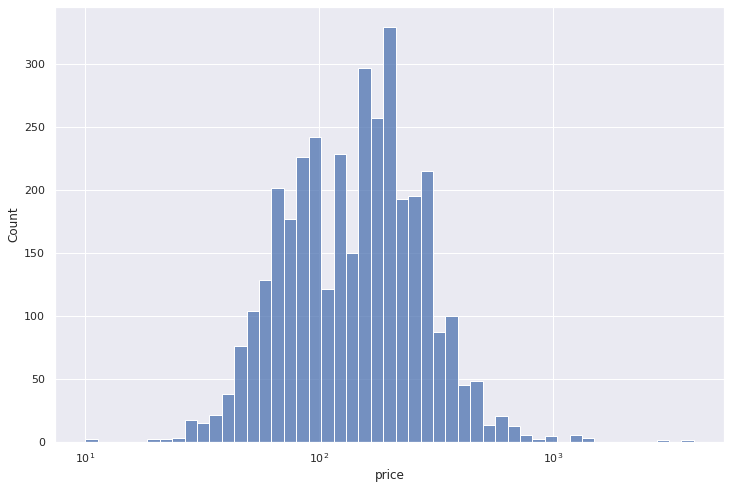

In [9]:
# On a log scale it looks more uniformly distributed:

sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=y, x=y, log_scale=True)

## 3. Data Preparation (Cleaning)

- In this section we split the features into numerical and categorical sets
- We explore the self correlation matrix of the numerical features
- We use imputting to fill missing values.
- We transform categorical feaatures into numerical ones
- Finally we combine all cleaned data into a feature set X, ready for use in modelling

### 3.1 Data Preparation - Select numeric features

In [10]:
# we only want to select numerical features with cardinality greater than 1; 
# a constant feature has no predicting value so we don't consider it

num_columns = [ (col, listings_df[col].nunique(), listings_df[col].isna().sum(), listings_df[col].dtype) \
               for col in listings_df.columns if listings_df[col].dtype != 'object' and 1 < listings_df[col].nunique() ]

In [11]:
num_columns

[('id', 3585, 0, dtype('int64')),
 ('host_id', 2181, 0, dtype('int64')),
 ('host_listings_count', 35, 0, dtype('int64')),
 ('host_total_listings_count', 35, 0, dtype('int64')),
 ('latitude', 3585, 0, dtype('float64')),
 ('longitude', 3585, 0, dtype('float64')),
 ('accommodates', 14, 0, dtype('int64')),
 ('bathrooms', 12, 14, dtype('float64')),
 ('bedrooms', 6, 10, dtype('float64')),
 ('beds', 11, 9, dtype('float64')),
 ('square_feet', 37, 3529, dtype('float64')),
 ('guests_included', 13, 0, dtype('int64')),
 ('minimum_nights', 29, 0, dtype('int64')),
 ('maximum_nights', 85, 0, dtype('int64')),
 ('availability_30', 31, 0, dtype('int64')),
 ('availability_60', 61, 0, dtype('int64')),
 ('availability_90', 91, 0, dtype('int64')),
 ('availability_365', 348, 0, dtype('int64')),
 ('number_of_reviews', 178, 0, dtype('int64')),
 ('review_scores_rating', 48, 813, dtype('float64')),
 ('review_scores_accuracy', 8, 823, dtype('float64')),
 ('review_scores_cleanliness', 9, 818, dtype('float64')),
 (

#### id is a synthetic unique field - we''l drop it because it has no prediction value
#### Same for the host_id: it is a synthetic Airbnb unique identifier for the host/user
#### square_feet is mostly null; we'll drop this field
#### host_listings_count and host_total_listings_count look very similar in terms of data dictionary description and unique values; the next cell proves these fields are identical so we'll drop one of them, say host_listings_count

In [12]:
sum(listings_df['host_listings_count'] != listings_df['host_total_listings_count'])

0

In [13]:
# recreate num_columns set with column names only:
num_columns = [ col \
               for col in listings_df.columns if listings_df[col].dtype != 'object' and 1 < listings_df[col].nunique() ]

# remove the fields listed above
num_columns = list(set(num_columns) - set(['id', 'host_id', 'host_listings_count', 'square_feet']))
num_columns

['accommodates',
 'availability_365',
 'availability_60',
 'guests_included',
 'number_of_reviews',
 'latitude',
 'maximum_nights',
 'bathrooms',
 'availability_30',
 'review_scores_cleanliness',
 'minimum_nights',
 'review_scores_accuracy',
 'review_scores_location',
 'availability_90',
 'review_scores_value',
 'longitude',
 'review_scores_rating',
 'review_scores_communication',
 'review_scores_checkin',
 'beds',
 'reviews_per_month',
 'calculated_host_listings_count',
 'bedrooms',
 'host_total_listings_count']

### 3.2 Data preparation: explore the self-correlation matrix of the numerical features

Having obtained the numerical features we divert just a little bit from Data Preparation to explore the self correlation matrix of these numerical features

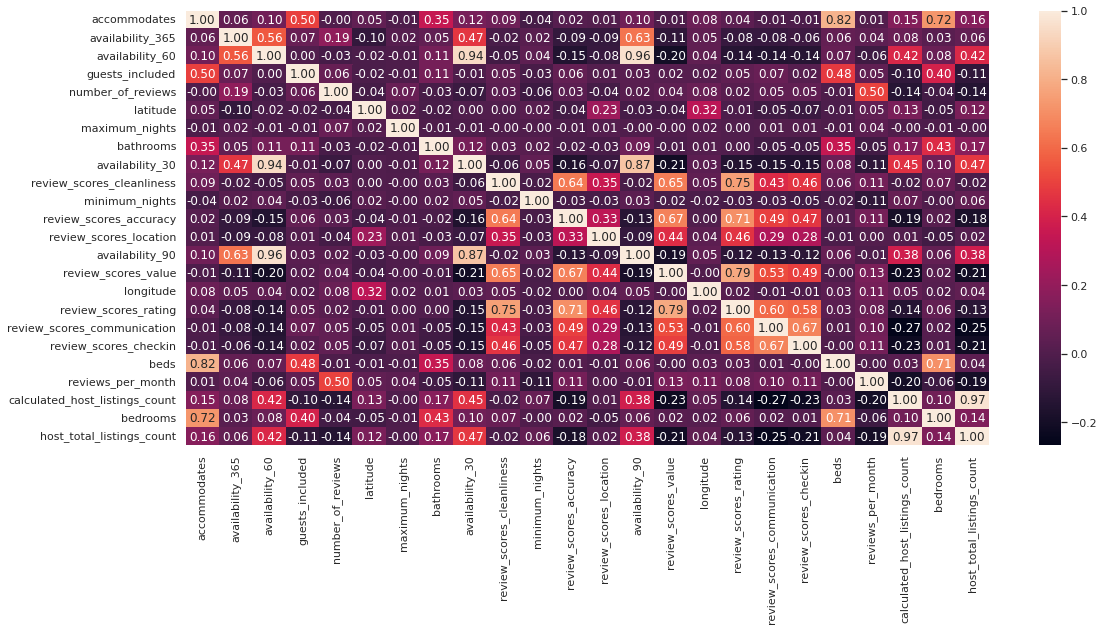

In [14]:
fig = plt.gcf()
fig.set_size_inches(18,8)
sns.heatmap(listings_df[num_columns].corr(), annot=True, fmt=".2f");

We can now comment on the first business question: Are there interesting features in the data set which support the common expectation of an Airbnb user? Can we spot interesting facts by looking just how such features are correlated?

Perhaps unsurprisingly, the following features show a significant degree of correlation: accomodates, bathrooms, bedrooms, beds, guests_included. They all describe in one way or another the capacity of the listing to accomodate people - so some degree of correlation is expected.

Another cluster of correlated features is the availability_30/60/90/365. Success is always unequally distributed, and the availability measures perhaps the (lack of) success of the listings. Popular listings will tend to be fully booked for most of the time while unpopular hosts will list availability for most of the foreseable periods: 30/60/90/365 days in the future - hence the significant correlation of these features. 

The availability features also show correlation with calculated_host_listings_count and host_total_listings_count, again, somewhat expected: the more listings there are per host, the more likely some of them will be available.

Finally there is a correlated cluster of features describing reviews - 7 of them. That means people tend to provide consistent reviews - be them on the positive or negative side.

### 3.3 Data preparation - Select categorical features

#### Let's have a look at the cardinality of the categorical features

In [15]:
cat_columns = [ (col, listings_df[col].nunique()) for col in listings_df.columns if listings_df[col].dtype == 'object' ]
sorted(cat_columns, key=lambda x: x[1])

[('last_scraped', 1),
 ('experiences_offered', 1),
 ('state', 1),
 ('country_code', 1),
 ('country', 1),
 ('calendar_last_scraped', 1),
 ('requires_license', 1),
 ('host_is_superhost', 2),
 ('host_has_profile_pic', 2),
 ('host_identity_verified', 2),
 ('is_location_exact', 2),
 ('instant_bookable', 2),
 ('require_guest_profile_picture', 2),
 ('require_guest_phone_verification', 2),
 ('room_type', 3),
 ('host_response_time', 4),
 ('market', 4),
 ('cancellation_policy', 4),
 ('bed_type', 5),
 ('property_type', 13),
 ('neighbourhood_cleansed', 25),
 ('neighbourhood', 30),
 ('city', 38),
 ('calendar_updated', 38),
 ('smart_location', 39),
 ('zipcode', 43),
 ('extra_people', 51),
 ('host_response_rate', 52),
 ('host_neighbourhood', 53),
 ('security_deposit', 54),
 ('host_acceptance_rate', 72),
 ('cleaning_fee', 79),
 ('host_verifications', 83),
 ('host_location', 176),
 ('weekly_price', 243),
 ('monthly_price', 288),
 ('price', 324),
 ('last_review', 404),
 ('first_review', 975),
 ('street'

#### The usual advice is to consider for numerical encoding only relatively low cardinality features with less than 10-15 distinct values; we'll set this threshold to 15 which will include the property type feature

In [16]:
cat_columns = [ col \
               for col in listings_df.columns if listings_df[col].dtype == 'object' and 1 < listings_df[col].nunique() <= 15]
cat_columns

['host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'market',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

### 3.4 Data Preparation: Fill in missig values for numeric and categorical features

#### 3.4.1 Fill in missig values for numerical features

According to this resource: https://www.kaggle.com/alexisbcook/missing-values , imputting a mean value 'generally performs quite well'. We'll use just this method since this work is biased towards simplicity.

In [17]:
# select numeric columns containing missing data

num_cols_with_missing = [col for col in num_columns if listings_df[col].isnull().any()]
num_cols_with_missing

['bathrooms',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_location',
 'review_scores_value',
 'review_scores_rating',
 'review_scores_communication',
 'review_scores_checkin',
 'beds',
 'reviews_per_month',
 'bedrooms']

Fill Missing Numerical Values

In [18]:
mean_imputer = SimpleImputer(strategy='mean')
imputed_X_num = pd.DataFrame(mean_imputer.fit_transform(listings_df[num_columns]))

# the imputation loses column names so add them back
imputed_X_num.columns = listings_df[num_columns].columns
imputed_X_num.head(3)

,accommodates,availability_365,availability_60,guests_included,number_of_reviews,latitude,maximum_nights,bathrooms,availability_30,review_scores_cleanliness,minimum_nights,review_scores_accuracy,review_scores_location,availability_90,review_scores_value,longitude,review_scores_rating,review_scores_communication,review_scores_checkin,beds,reviews_per_month,calculated_host_listings_count,bedrooms,host_total_listings_count
0,4.0,0.0,0.0,1.0,0.0,42.282619,1125.0,1.5,0.0,9.258041,2.0,9.431571,9.414043,0.0,9.168234,-71.133068,91.916667,9.646549,9.646293,3.0,1.970908,1.0,2.0,1.0
1,2.0,359.0,54.0,0.0,36.0,42.286241,15.0,1.0,26.0,9.000000,2.0,10.000000,9.000000,84.0,9.000000,-71.134374,94.000000,10.000000,10.000000,1.0,1.300000,1.0,1.0,1.0
2,2.0,319.0,46.0,1.0,41.0,42.292438,45.0,1.0,19.0,9.000000,3.0,10.000000,9.000000,61.0,10.000000,-71.135765,98.000000,10.000000,10.000000,1.0,0.470000,1.0,1.0,1.0


#### 3.4.2 Fill in missig values for categorical features

In [19]:
# select categorical columns containing missing data
cat_cols_with_missing = [col for col in cat_columns if listings_df[col].isnull().any()]
cat_cols_with_missing

# similarly to the numeric approach, we use a simple strategy of filling missing data 
# with the most frequent values in the respective columns
mf_imputer = SimpleImputer(strategy='most_frequent')
imputed_X_cat = pd.DataFrame(mf_imputer.fit_transform(listings_df[cat_columns]))

# again, restore the column names lost during the imputation process
imputed_X_cat.columns = listings_df[cat_columns].columns
imputed_X_cat.head(3)

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,market,is_location_exact,property_type,room_type,bed_type,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within an hour,f,t,f,Boston,t,House,Entire home/apt,Real Bed,f,moderate,f,f
1,within an hour,f,t,t,Boston,t,Apartment,Private room,Real Bed,t,moderate,f,f
2,within a few hours,t,t,t,Boston,t,Apartment,Private room,Real Bed,f,moderate,t,f


### 3.5 Data Preparation: Transform categorical features in numerical features using one hot encoding

Here again, the choice for encoding is a bit arbitrary. This resource https://www.kaggle.com/alexisbcook/categorical-variables specify that 'usually one hot encoding performs best'. So we'll use just that.

In [20]:
# one hot encoding
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_X_cat = pd.DataFrame(oh_encoder.fit_transform(imputed_X_cat))

# one hot encoding removes the index; add it back
ohe_X_cat.index = imputed_X_cat.index

# it also looses the column names an values; we can at least recover easily the values
ohe_X_cat.columns = oh_encoder.get_feature_names()
ohe_X_cat.head(3)

,x0_a few days or more,x0_within a day,x0_within a few hours,x0_within an hour,x1_f,x1_t,x2_f,x2_t,x3_f,x3_t,x4_Boston,x4_Other (Domestic),x4_Other (International),x4_San Francisco,x5_f,x5_t,x6_Apartment,x6_Bed & Breakfast,x6_Boat,x6_Camper/RV,x6_Condominium,x6_Dorm,x6_Entire Floor,x6_Guesthouse,x6_House,x6_Loft,x6_Other,x6_Townhouse,x6_Villa,x7_Entire home/apt,x7_Private room,x7_Shared room,x8_Airbed,x8_Couch,x8_Futon,x8_Pull-out Sofa,x8_Real Bed,x9_f,x9_t,x10_flexible,x10_moderate,x10_strict,x10_super_strict_30,x11_f,x11_t,x12_f,x12_t
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


the x0..x12 prefixes correspond to the column positions in the imputed_X_cat dataframe:

In [21]:
imputed_X_cat.columns

Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'market', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

### 3.6 Assemble the final set of features

In [22]:
# finnaly we can build X with numeric features;
X = pd.concat([imputed_X_num, ohe_X_cat], axis=1)
X.head(3)

,accommodates,availability_365,availability_60,guests_included,number_of_reviews,latitude,maximum_nights,bathrooms,availability_30,review_scores_cleanliness,minimum_nights,review_scores_accuracy,review_scores_location,availability_90,review_scores_value,longitude,review_scores_rating,review_scores_communication,review_scores_checkin,beds,reviews_per_month,calculated_host_listings_count,bedrooms,host_total_listings_count,x0_a few days or more,x0_within a day,x0_within a few hours,x0_within an hour,x1_f,x1_t,x2_f,x2_t,x3_f,x3_t,x4_Boston,x4_Other (Domestic),x4_Other (International),x4_San Francisco,x5_f,x5_t,x6_Apartment,x6_Bed & Breakfast,x6_Boat,x6_Camper/RV,x6_Condominium,x6_Dorm,x6_Entire Floor,x6_Guesthouse,x6_House,x6_Loft,x6_Other,x6_Townhouse,x6_Villa,x7_Entire home/apt,x7_Private room,x7_Shared room,x8_Airbed,x8_Couch,x8_Futon,x8_Pull-out Sofa,x8_Real Bed,x9_f,x9_t,x10_flexible,x10_moderate,x10_strict,x10_super_strict_30,x11_f,x11_t,x12_f,x12_t
0,4.0,0.0,0.0,1.0,0.0,42.282619,1125.0,1.5,0.0,9.258041,2.0,9.431571,9.414043,0.0,9.168234,-71.133068,91.916667,9.646549,9.646293,3.0,1.970908,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,359.0,54.0,0.0,36.0,42.286241,15.0,1.0,26.0,9.000000,2.0,10.000000,9.000000,84.0,9.000000,-71.134374,94.000000,10.000000,10.000000,1.0,1.300000,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.0,319.0,46.0,1.0,41.0,42.292438,45.0,1.0,19.0,9.000000,3.0,10.000000,9.000000,61.0,10.000000,-71.135765,98.000000,10.000000,10.000000,1.0,0.470000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## 4. Modelling

In this section we'll run 3 models and compare their effectiveness with our baseline, the mean price of the listings.
To compare the models we use the mean absolute error metric. For details see: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error

## 8. Run prediction models

### 8.0 Our baseline: the mean

In [23]:
# first calculate the mean absolute error when the prediction is just a simple average
y_pred = y.copy()
y_pred = y_pred - y_pred + y.mean()
mean_absolute_error(y, y_pred)

88.5849858682057

In [24]:
# Split the X and y data sets into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, 
                                                      random_state=0)

### 8.1 Linear model

In [25]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_pred = lm_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

61.1952580195258

### 8.2 Random Forest model

In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

52.53539748953975

### 8.3 XGBoost model

In [27]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

56.21898994685217

### 8.4 XGBoost model with a bit of tuning

In [28]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

51.6961121765307

## 5. Evaluation

In this section we extract the feature importance produced by our Random Forest and (tuned) XGBoost models and comment on their significance. In doing so we address the last 2 business questions:

2. Can we predict prices better than the simple average value of $174?
3. What are the most important features determining the price of a listing?

The second question is an easy "yes". All three prediction algorithms perform better than the mean predictor.

Let's have a look at the features importance and answer the third question:

In [29]:
# select the first 15 most important Random Forest features
fi = pd.DataFrame(rf_model.feature_importances_, index=X_test.columns, columns=['fi']).sort_values('fi', ascending=False)
fi[:15]

,fi
x7_Entire home/apt,0.233748
longitude,0.172493
bathrooms,0.119372
latitude,0.076484
availability_365,0.029527
availability_90,0.027550
bedrooms,0.026099
availability_60,0.024791
availability_30,0.023557
number_of_reviews,0.023030


In [30]:
# select the first 15 most important XGBoost features
fi = pd.DataFrame(xgb_model.feature_importances_, index=X_test.columns, columns=['fi']).sort_values('fi', ascending=False)
fi[:15]

,fi
x7_Entire home/apt,0.355540
x10_super_strict_30,0.103870
bathrooms,0.095289
bedrooms,0.083947
x12_f,0.031643
x3_f,0.025913
x0_a few days or more,0.022032
longitude,0.021812
x6_Other,0.020212
availability_60,0.016768


Top spot on both algorithms is "x7_Entire home/apt" which is a categorical value present in the initial field room_type. So, whether you share the property or not with someone else has the most impact on the price. Perhaps people prefer not to share the property during their stay thus driving up prices for this type of listing.

Bathrooms and bedrooms also have a big impact on the price as well as the availability. Again, not surprising, the bigger the house the bigger the number of bathrooms and bedrooms which drives the price up.

On the location, both alghoritms give a high rank to the longitude. Latitude is also important but less so, ranking 4th on Random Forest and not event making the top 10 for XGBoost (but close - it takes the 11th spot). Location matters but it seems the Est-West position is more important than the North-South one - this may mean something to people familiar with the Boston area.

## 6. Deployment

We are not doing any deployment in this exercise but we should say that for a real deployment the model(s) above should be refined. A few ideas of improvements are:

- There are probably too many features considered and the model(s) could be simplyfied. 
- The choices for filling missing data and encoding categorical data can be challanged and more experiments could lead to better results.
- The data set is small and a cross-validation technique could lead to better estimates on how the model(s) perform with new data.
